In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df= pd.read_csv("DifAmp_Data_set.csv")
df= df.iloc[:,1:]

df.iloc[:,0:97].head()

,z1,z2,z3,z4,z5,z6,z7,z8,z9,z10,...,z88,z89,z90,z91,z92,z93,z94,z95,z96,z97
0,3.479755e-11,1.729669e-06,-1.074505e-06,1.696733e-06,1.408154e-06,-1.247660e-06,4.392523e-07,-1.822577e-07,-1.978193e-06,-4.215552e-08,...,-3.758139e-07,-2.056056e-07,-1.810260e-06,1.181334e-06,4.510038e-07,4.933022e-08,-1.209462e-06,8.495825e-08,-1.360888e-07,-8.673617e-19
1,-5.774669e-10,-9.667019e-07,-1.172746e-06,-8.148441e-07,-1.085682e-06,-2.618001e-08,1.536875e-06,-4.809667e-07,7.355430e-08,1.620232e-06,...,-9.616060e-07,-3.501720e-07,2.454178e-06,-9.384168e-07,-2.559091e-07,9.168085e-07,8.087109e-07,7.078943e-07,4.946341e-07,-6.505213e-19
2,7.974670e-10,5.440602e-07,5.968525e-07,-2.136242e-08,-2.463316e-07,4.842712e-07,-8.860241e-07,6.470653e-07,5.430934e-07,-1.458603e-06,...,1.308622e-06,-1.009185e-06,-2.592479e-06,-1.474458e-06,-1.413626e-06,1.379344e-07,-3.167636e-07,-5.100911e-07,-4.025520e-07,1.301043e-18
3,-2.959882e-10,3.390513e-07,2.861875e-07,1.237342e-06,1.548561e-06,-4.017564e-07,-7.252355e-07,-5.407646e-07,-1.974723e-08,-8.548541e-07,...,-1.048949e-06,7.127258e-07,5.924098e-07,-6.060519e-07,2.269420e-06,3.904686e-07,-5.901801e-07,9.370105e-07,1.087443e-07,-3.373336e-09
4,1.426321e-10,-8.383938e-07,-8.720060e-08,-1.354042e-06,-1.309397e-06,9.558595e-07,9.235621e-07,1.726365e-06,1.359531e-07,-4.867452e-07,...,-6.893331e-07,2.709754e-08,-1.047473e-07,6.156120e-07,-2.116315e-06,-1.872924e-06,3.991558e-07,-2.448489e-07,2.474903e-07,3.373336e-09


In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [3]:
model = Sequential()
model.add(Dense(90, input_shape=(97,),activation='relu'))
model.add(Dense(45,activation="relu"))
model.add(Dense(25,activation="relu"))
model.add(Dense(45,activation="relu"))

model.add(Dense(90,activation="relu"))
model.add(Dense(97,activation="sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 90)                8820      
_________________________________________________________________
dense_1 (Dense)              (None, 45)                4095      
_________________________________________________________________
dense_2 (Dense)              (None, 25)                1150      
_________________________________________________________________
dense_3 (Dense)              (None, 45)                1170      
_________________________________________________________________
dense_4 (Dense)              (None, 90)                4140      
_________________________________________________________________
dense_5 (Dense)              (None, 97)                8827      
Total params: 28,202
Trainable params: 28,202
Non-trainable params: 0
____________________________________________________

In [4]:
model.compile(optimizer='adam',loss='mae')


In [5]:
x=df.iloc[:, 0:97]
y=df["isIntrusion"]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0,shuffle =False)
x_train.head()

,z1,z2,z3,z4,z5,z6,z7,z8,z9,z10,...,z88,z89,z90,z91,z92,z93,z94,z95,z96,z97
0,3.479755e-11,1.729669e-06,-1.074505e-06,1.696733e-06,1.408154e-06,-1.247660e-06,4.392523e-07,-1.822577e-07,-1.978193e-06,-4.215552e-08,...,-3.758139e-07,-2.056056e-07,-1.810260e-06,1.181334e-06,4.510038e-07,4.933022e-08,-1.209462e-06,8.495825e-08,-1.360888e-07,-8.673617e-19
1,-5.774669e-10,-9.667019e-07,-1.172746e-06,-8.148441e-07,-1.085682e-06,-2.618001e-08,1.536875e-06,-4.809667e-07,7.355430e-08,1.620232e-06,...,-9.616060e-07,-3.501720e-07,2.454178e-06,-9.384168e-07,-2.559091e-07,9.168085e-07,8.087109e-07,7.078943e-07,4.946341e-07,-6.505213e-19
2,7.974670e-10,5.440602e-07,5.968525e-07,-2.136242e-08,-2.463316e-07,4.842712e-07,-8.860241e-07,6.470653e-07,5.430934e-07,-1.458603e-06,...,1.308622e-06,-1.009185e-06,-2.592479e-06,-1.474458e-06,-1.413626e-06,1.379344e-07,-3.167636e-07,-5.100911e-07,-4.025520e-07,1.301043e-18
3,-2.959882e-10,3.390513e-07,2.861875e-07,1.237342e-06,1.548561e-06,-4.017564e-07,-7.252355e-07,-5.407646e-07,-1.974723e-08,-8.548541e-07,...,-1.048949e-06,7.127258e-07,5.924098e-07,-6.060519e-07,2.269420e-06,3.904686e-07,-5.901801e-07,9.370105e-07,1.087443e-07,-3.373336e-09
4,1.426321e-10,-8.383938e-07,-8.720060e-08,-1.354042e-06,-1.309397e-06,9.558595e-07,9.235621e-07,1.726365e-06,1.359531e-07,-4.867452e-07,...,-6.893331e-07,2.709754e-08,-1.047473e-07,6.156120e-07,-2.116315e-06,-1.872924e-06,3.991558e-07,-2.448489e-07,2.474903e-07,3.373336e-09


In [6]:
model.fit(x_train,x_train,batch_size=20,epochs=20, validation_data=(x_test, x_test))

Epoch 1/20
38/38 [==============================] - 0s 9ms/step - loss: 0.4646 - val_loss: 0.3265
Epoch 2/20
38/38 [==============================] - 0s 3ms/step - loss: 0.0757 - val_loss: 2.1097e-04
Epoch 3/20
38/38 [==============================] - 0s 2ms/step - loss: 9.1853e-05 - val_loss: 5.5742e-05
Epoch 4/20
38/38 [==============================] - 0s 3ms/step - loss: 4.8155e-05 - val_loss: 3.8946e-05
Epoch 5/20
38/38 [==============================] - 0s 2ms/step - loss: 3.2598e-05 - val_loss: 2.5214e-05
Epoch 6/20
38/38 [==============================] - 0s 2ms/step - loss: 2.1141e-05 - val_loss: 1.6502e-05
Epoch 7/20
38/38 [==============================] - 0s 2ms/step - loss: 1.4388e-05 - val_loss: 1.1677e-05
Epoch 8/20
38/38 [==============================] - 0s 3ms/step - loss: 1.0685e-05 - val_loss: 9.0225e-06
Epoch 9/20
38/38 [==============================] - 0s 2ms/step - loss: 8.6181e-06 - val_loss: 7.5052e-06
Epoch 10/20
38/38 [==============================] - 0s 2m

(250,)


(array([29., 39., 34., 28., 22., 12., 22., 14., 12.,  7.,  2.,  1.,  1.,
         2.,  2.,  2.,  1.,  0.,  0.,  0.,  0.,  0.,  3.,  1.,  1.,  2.,
         1.,  1.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  1.,  0.,  2.,  1.,
         1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  2.]),
 array([1.47027133e-06, 1.97624978e-06, 2.48222822e-06, 2.98820667e-06,
        3.49418512e-06, 4.00016356e-06, 4.50614201e-06, 5.01212046e-06,
        5.51809890e-06, 6.02407735e-06, 6.53005580e-06, 7.03603424e-06,
        7.54201269e-06, 8.04799113e-06, 8.55396958e-06, 9.05994803e-06,
        9.56592647e-06, 1.00719049e-05, 1.05778834e-05, 1.10838618e-05,
        1.15898403e-05, 1.20958187e-05, 1.26017972e-05, 1.31077756e-05,
        1.36137540e-05, 1.41197325e-05, 1.46257109e-05, 1.51316894e-05,
        1.56376678e-05, 1.61436463e-05, 1.66496247e-05, 1.71556032e-05,
        1.76615816e-05, 1.81675601e-05, 1.86735385e-05, 1.91795170e-05,
        1.96854954e-05, 2.01914739e-05, 2.06974523e-05, 2.12034307e-

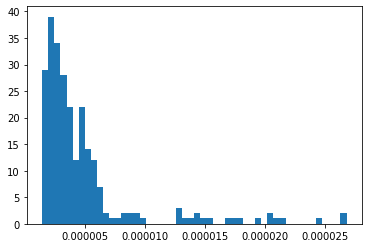

In [56]:
pred= model.predict(x_test)
los= keras.losses.mae(pred,x_test)
print(los.shape)
plt.hist(los,bins=50)

In [57]:
m=np.mean(los)
s=np.std(los)
print(m,s)

4.780269139864414e-06 4.3538993995794256e-06


### creating a dynamic envelop for finding threshold

Text(0.5, 1.0, 'Plot of enevelop')

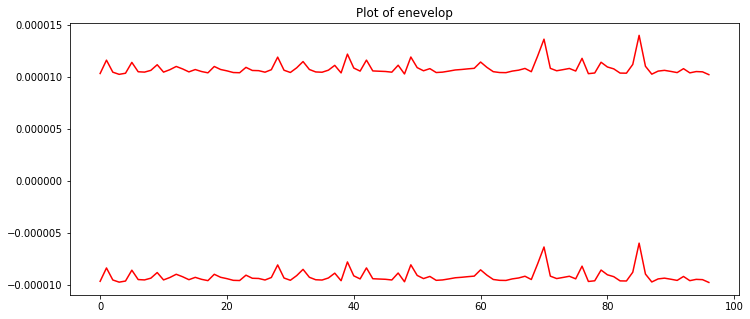

In [58]:
#  creating threshold envelop
new_thresh1=pred+2.3*s;

new_thresh2=pred-2.3*s;
plt.figure(figsize=(12, 5))
plt.plot(new_thresh1[0],color="r")
plt.plot(new_thresh2[0],color="r")
plt.title("Plot of enevelop")

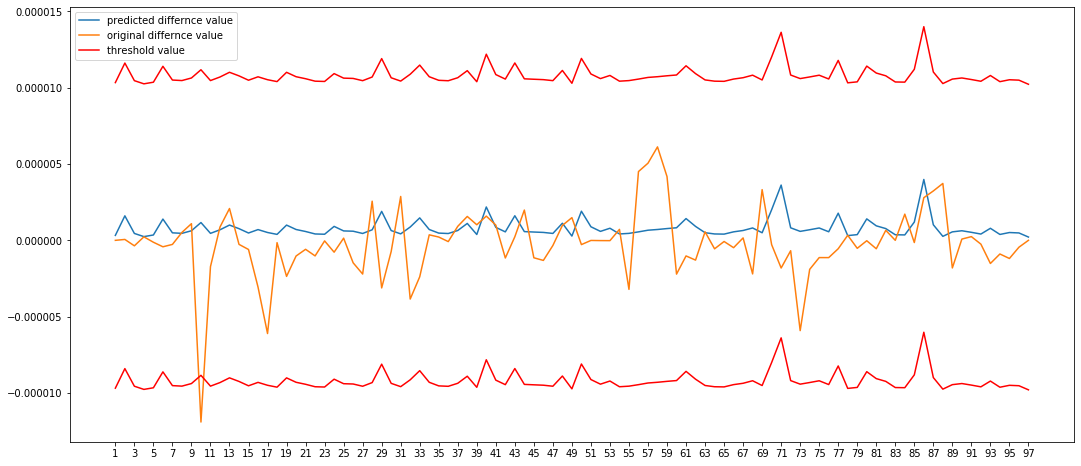

In [59]:
plt.figure(figsize=(18, 8))
x1=[x for x in range(1,98)]
plt.plot(x1,pred[102],label="predicted differnce value")
plt.plot(x1,x.iloc[102],label="original differnce value")
# plt.axhline(y=thr, color='r', linestyle='-')
plt.plot(x1,new_thresh1[102],color='r', label="threshold value")
plt.plot(x1,new_thresh2[102],color='r')
plt.legend(loc='upper left')
plt.xticks(np.arange(1, 98, 2.0))
plt.show()

In [60]:
list1=[0*x for x in range(250)]

for i in range(250):
    temp=[]
    for j in range(97):
        data= x.iloc[i][j];
        if data> new_thresh1[i][j] or data< new_thresh2[i][j]:
            if list1[i]==0:
                list1[i]=j+1


In [61]:
correct=0       
for i in range(250):
    if list1[i]==df["intrusion_zone"][i]:
        correct+=1
        
print(correct, " percentage ", correct/2.45)


237  percentage  96.73469387755101


form the model we can see 236/245 casesa are correctly predicted

##### model accuray is 96.3265%

In [96]:
def prediction_zone(inp_trace):
    pred_trace=model.predict(inp_trace)
    new_thresh1=pred_trace[0]+2.3*s;
    new_thresh2=pred_trace[0]-2.3*s;
    for j in range(97):
        data=inp_trace.iloc[0][j]
        if data> new_thresh1[j] or data< new_thresh2[j]:
            return j+1

print("Zone of intrusion  :", prediction_zone(x.iloc[102:103]))
print("Zone of intrusion  :", prediction_zone(x.iloc[202:203]))
print("Zone of intrusion  :", prediction_zone(x.iloc[702:703]))

Zone of intrusion  : 10
Zone of intrusion  : 20
Zone of intrusion  : 70
